In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter

In [2]:
cust_df = pd.read_csv("customer_segmentation_data.csv")
cust_df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [3]:
cust_df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [4]:
cust_df.dtypes

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object

In [7]:
cust_df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


## 1. Demographic Analysis 

In [15]:
# age Distribution 
age_distribution = cust_df['Age'].describe()
age_distribution

count    53503.000000
mean        44.140945
std         15.079486
min         18.000000
25%         32.000000
50%         43.000000
75%         57.000000
max         70.000000
Name: Age, dtype: float64

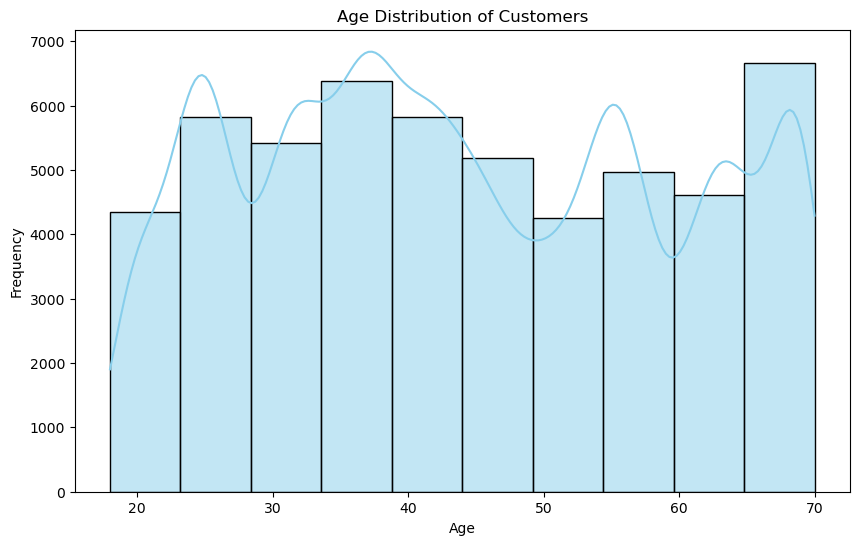

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(cust_df['Age'], kde=True, bins=10, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Income Levels 
income_distribution = cust_df['Income Level'].describe()
income_distribution

count     53503.000000
mean      82768.324318
std       36651.075670
min       20001.000000
25%       51568.500000
50%       80719.000000
75%      115973.500000
max      149999.000000
Name: Income Level, dtype: float64

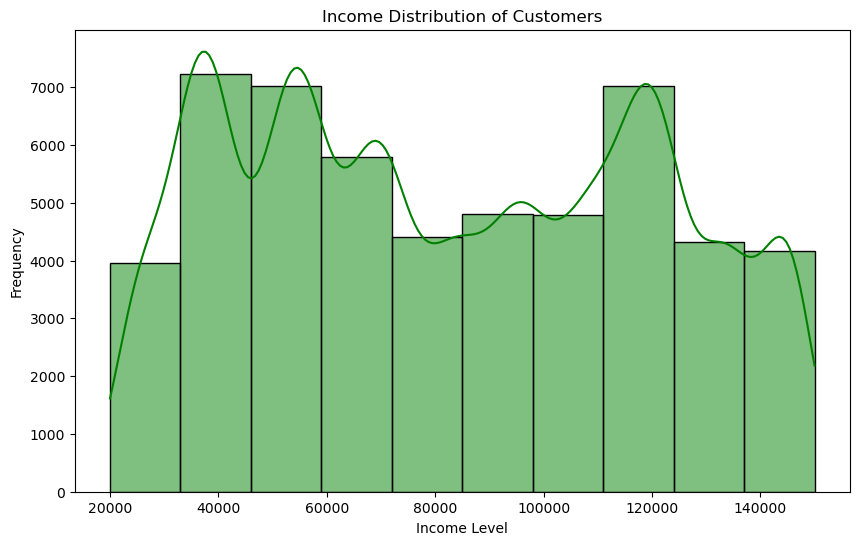

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(cust_df['Income Level'], kde=True, bins=10, color='green')
plt.title("Income Distribution of Customers")
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.show()

In [20]:
# gender distribution
gender_proportions = cust_df['Gender'].value_counts(normalize=True) * 100
gender_proportions

Gender
Male      51.397118
Female    48.602882
Name: proportion, dtype: float64

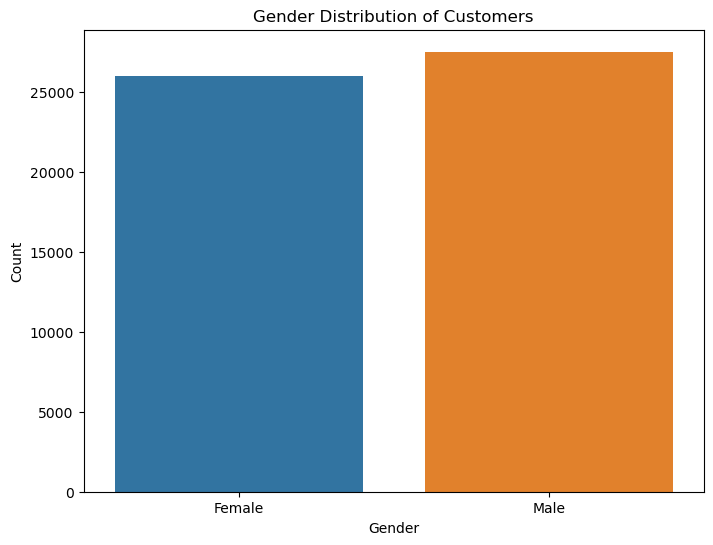

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=cust_df, hue='Gender')
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [27]:
# Geographical Distrubution
geo_distribution = cust_df['Geographic Information'].value_counts()
geo_distribution

Geographic Information
Lakshadweep                    2140
Himachal Pradesh               1963
Bihar                          1962
Haryana                        1931
Arunachal Pradesh              1903
Gujarat                        1895
Uttar Pradesh                  1855
Uttarakhand                    1758
Delhi                          1756
Madhya Pradesh                 1710
Andaman and Nicobar Islands    1678
Sikkim                         1654
Goa                            1605
Jharkhand                      1578
Nagaland                       1529
Daman and Diu                  1512
Mizoram                        1472
West Bengal                    1464
Assam                          1460
Chhattisgarh                   1451
Meghalaya                      1447
Andhra Pradesh                 1431
Maharashtra                    1428
Dadra and Nagar Haveli         1403
Manipur                        1391
Tripura                        1377
Chandigarh                     1376
Tamil

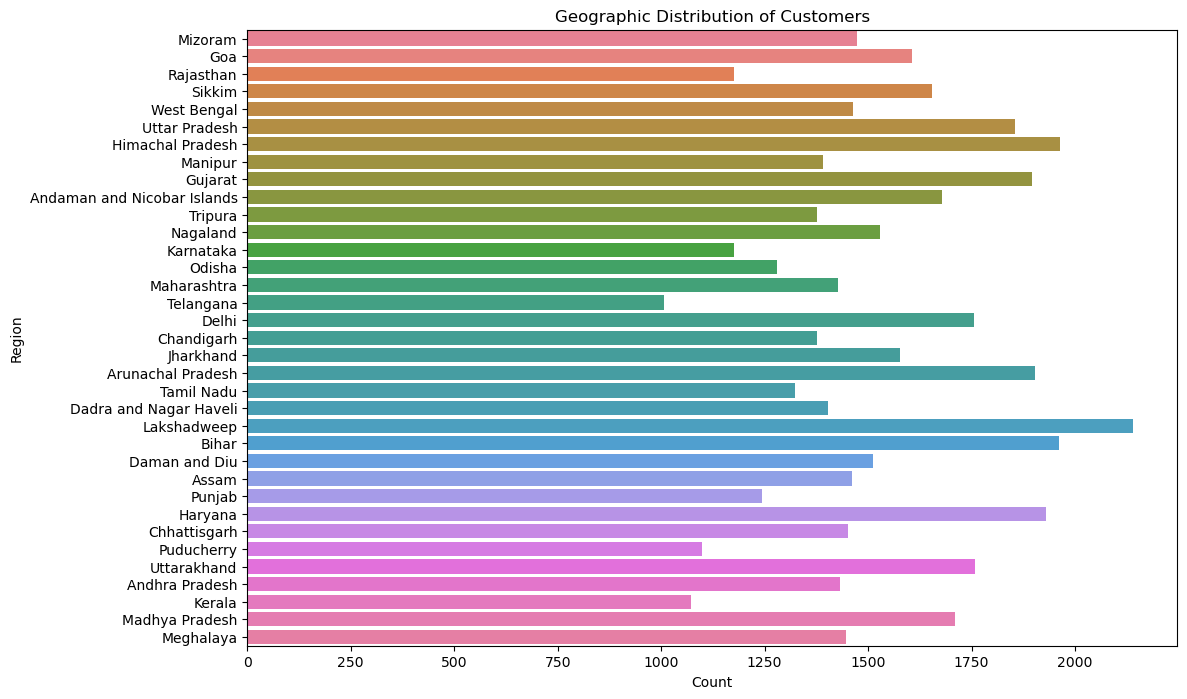

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Geographic Information', data=cust_df, hue="Geographic Information")
plt.title("Geographic Distribution of Customers")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

In [28]:
# Language Distribution
language_distribution = cust_df['Preferred Language'].value_counts()
language_distribution

Preferred Language
German      14452
French      13362
English      9587
Mandarin     8358
Spanish      7744
Name: count, dtype: int64

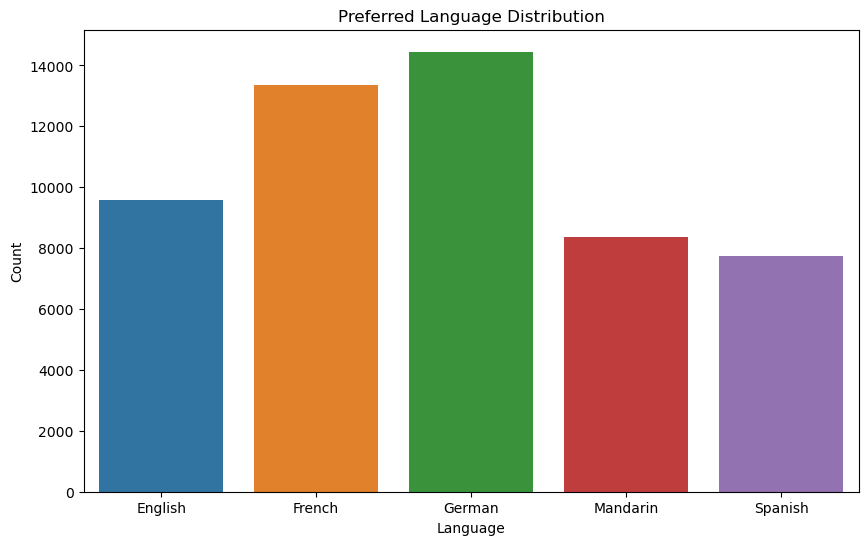

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Language', data=cust_df, hue="Preferred Language")
plt.title("Preferred Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

## 2. Purchasing Patterns

In [30]:
cust_df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [31]:
cust_df.dtypes

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object

In [33]:
cust_df['Purchase History'] = pd.to_datetime(cust_df['Purchase History'], errors='coerce')
cust_df.dtypes

Customer ID                                    int64
Age                                            int64
Gender                                        object
Marital Status                                object
Education Level                               object
Geographic Information                        object
Occupation                                    object
Income Level                                   int64
Behavioral Data                               object
Purchase History                      datetime64[ns]
Interactions with Customer Service            object
Insurance Products Owned                      object
Coverage Amount                                int64
Premium Amount                                 int64
Policy Type                                   object
Customer Preferences                          object
Preferred Communication Channel               object
Preferred Contact Time                        object
Preferred Language                            

In [37]:
# Count the number of times each product is purchased
product_counts = cust_df['Purchase History'].value_counts()
# Display frequently purchased products
print("Frequently Purchased Products:")
print(product_counts)

Frequently Purchased Products:
Purchase History
2018-03-12    173
2022-03-11     82
2018-12-02     82
2023-01-10     80
2020-05-10     76
             ... 
2020-10-02      2
2022-05-05      2
2021-03-03      1
2020-04-04      1
2021-02-12      1
Name: count, Length: 864, dtype: int64


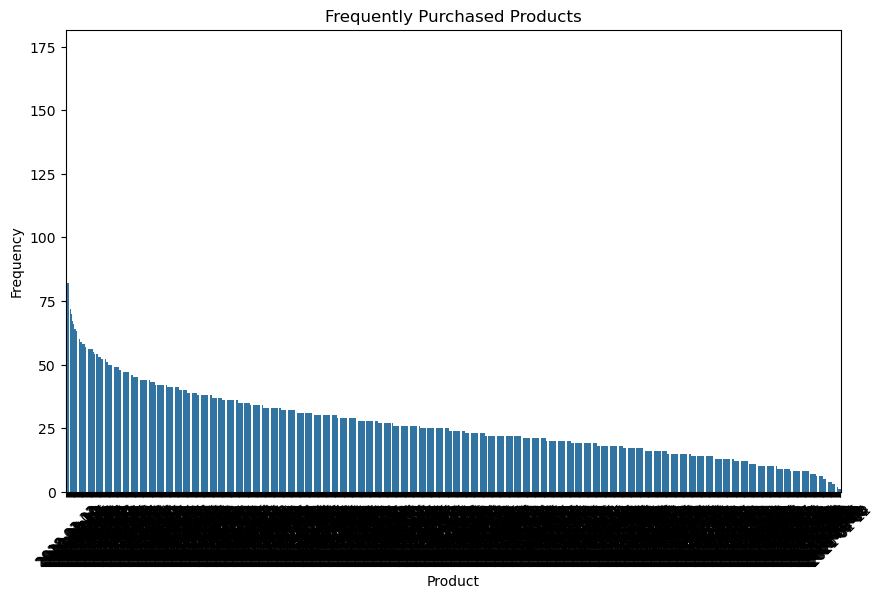

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Frequently Purchased Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Identify Seasonal Buying Trends
# Create a new column for 'Month' and 'Year' from 'Purchase Date'
cust_df['Month'] = cust_df['Purchase History'].dt.month
cust_df['Year'] = cust_df['Purchase History'].dt.year
seasonal_trends = cust_df.groupby('Month')['Purchase History'].count()
seasonal_trends

Month
1.0     1931
2.0     1776
3.0     2114
4.0     1798
5.0     1869
6.0     1837
7.0     1823
8.0     1774
9.0     1953
10.0    1884
11.0    1937
12.0    1999
Name: Purchase History, dtype: int64

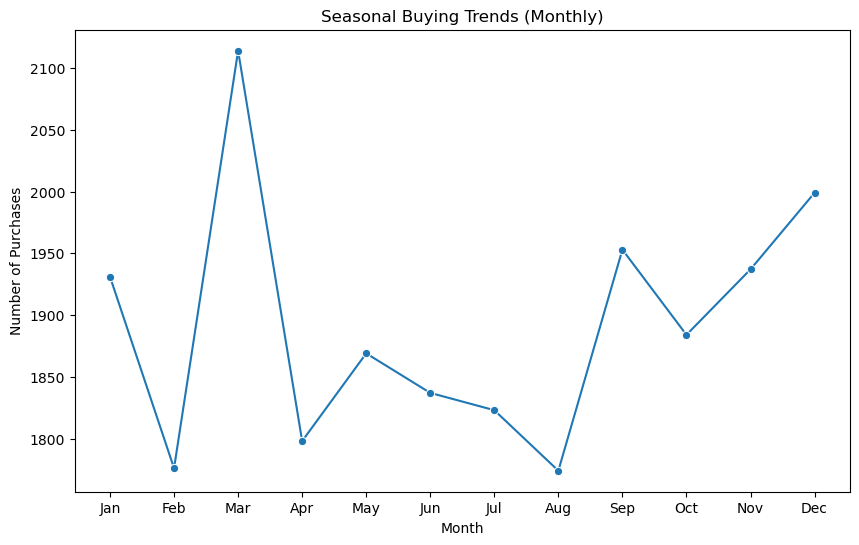

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonal_trends.index, y=seasonal_trends.values, marker='o')
plt.title('Seasonal Buying Trends (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [46]:
# dentify Recurring Orders (Repeat Purchases)
# Count the number of recurring purchases per customer
customer_purchases = cust_df.groupby('Customer ID')['Purchase History'].apply(list)

# Find customers with repeated purchases (recurring products)
recurring_orders = {customer: Counter(purchases) for customer, purchases in customer_purchases.items()}
recurring_orders = {customer: {k: v for k, v in count.items() if v > 1} for customer, count in recurring_orders.items()}

# Display customers with recurring purchases
print("\nCustomers with Recurring Purchases:")
for customer, orders in recurring_orders.items():
    if orders:
        print(f"Customer {customer}: {orders}")


Customers with Recurring Purchases:
Customer 1: {NaT: 26}
Customer 598: {NaT: 2}
Customer 811: {NaT: 2}
Customer 839: {NaT: 2}
Customer 858: {NaT: 2}
Customer 994: {NaT: 3}
Customer 1039: {NaT: 2}
Customer 1232: {NaT: 3}
Customer 1259: {NaT: 2}
Customer 1270: {NaT: 2}
Customer 1553: {NaT: 2}
Customer 1809: {NaT: 2}
Customer 1836: {NaT: 2}
Customer 1841: {NaT: 2}
Customer 1866: {NaT: 2}
Customer 1900: {NaT: 2}
Customer 1918: {NaT: 2}
Customer 1962: {NaT: 2}
Customer 2006: {NaT: 2}
Customer 2013: {NaT: 2}
Customer 2014: {NaT: 2}
Customer 2051: {NaT: 2}
Customer 2053: {NaT: 2}
Customer 2083: {NaT: 2}
Customer 2110: {NaT: 2}
Customer 2122: {NaT: 2}
Customer 2129: {NaT: 2}
Customer 2139: {NaT: 2}
Customer 2161: {NaT: 2}
Customer 2172: {NaT: 3}
Customer 2178: {NaT: 2}
Customer 2191: {NaT: 2}
Customer 2275: {NaT: 2}
Customer 2295: {NaT: 2}
Customer 2307: {NaT: 2}
Customer 2329: {NaT: 2}
Customer 2354: {NaT: 2}
Customer 2363: {NaT: 2}
Customer 2379: {NaT: 2}
Customer 2382: {NaT: 2}
Customer 2

In [48]:
# Identify Customer Preferences across Policy Types
# Count the number of customers who prefer each policy type
policy_type_preferences = cust_df.groupby('Policy Type')['Customer ID'].nunique()
# Display customer preferences for policy types
print("\nCustomer Preferences for Policy Types:")
print(policy_type_preferences)


Customer Preferences for Policy Types:
Policy Type
Business      12939
Family        11614
Group         16445
Individual     8388
Name: Customer ID, dtype: int64


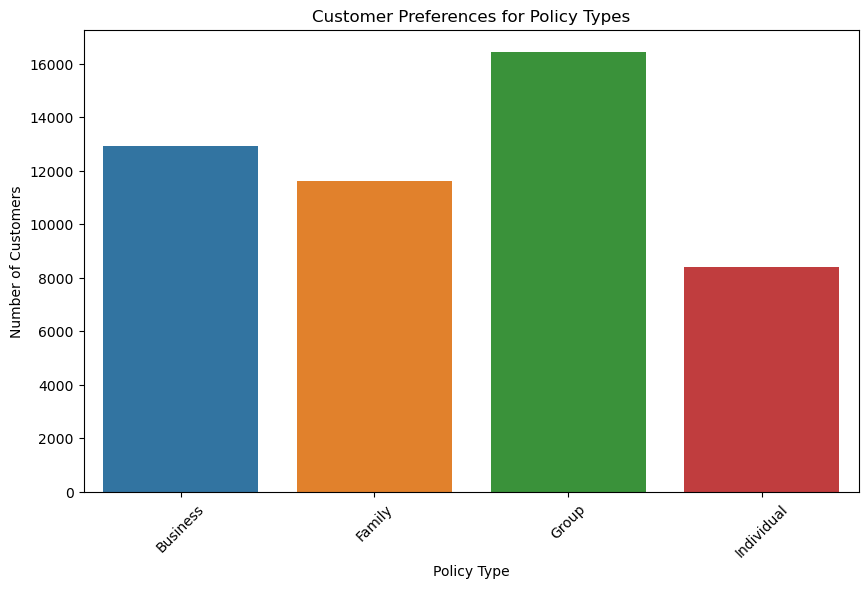

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=policy_type_preferences.index, y=policy_type_preferences.values, legend=False, hue=policy_type_preferences.index)
plt.title('Customer Preferences for Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

## 3. Behavioral Insights

In [79]:
cust_df['Purchase History'] = pd.to_datetime(cust_df['Purchase History'], errors='coerce')

# Extract Year and Month from 'Purchase Date'
cust_df['Month'] = cust_df['Purchase History'].dt.month
cust_df['Year'] = cust_df['Purchase History'].dt.year

# Group by 'Year', 'Month', and 'Purchase History' to count purchases
monthly_product_interest = cust_df.groupby(['Year', 'Month', 'Purchase History']).size().reset_index(name='Purchase Count')

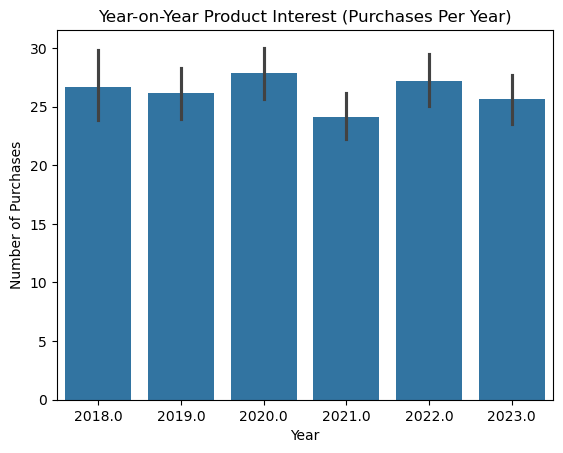

In [80]:
# Year-on-Year Product Interest
# Group data by year and product to get the total purchase count per year for each product
yearly_product_interest = monthly_product_interest.groupby(['Year', 'Purchase History'])['Purchase Count'].sum().reset_index()

# Create a bar plot for year-on-year comparison
# plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Purchase Count', data=yearly_product_interest)
plt.title('Year-on-Year Product Interest (Purchases Per Year)')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
# plt.legend(title='Product Type (Policy)', loc='upper left')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

In [56]:
# Evaluate Cart Abandonment
# We can't directly track cart abandonment, but we can analyze customer interactions with customer service.
# Count the number of interactions per customer
interaction_counts = cust_df.groupby('Customer ID')['Interactions with Customer Service'].count()
interaction_counts

Customer ID
1         34
5          1
23         1
37         1
49         1
          ..
99772      1
99891      1
99962      1
99988      1
100000    15
Name: Interactions with Customer Service, Length: 40259, dtype: int64

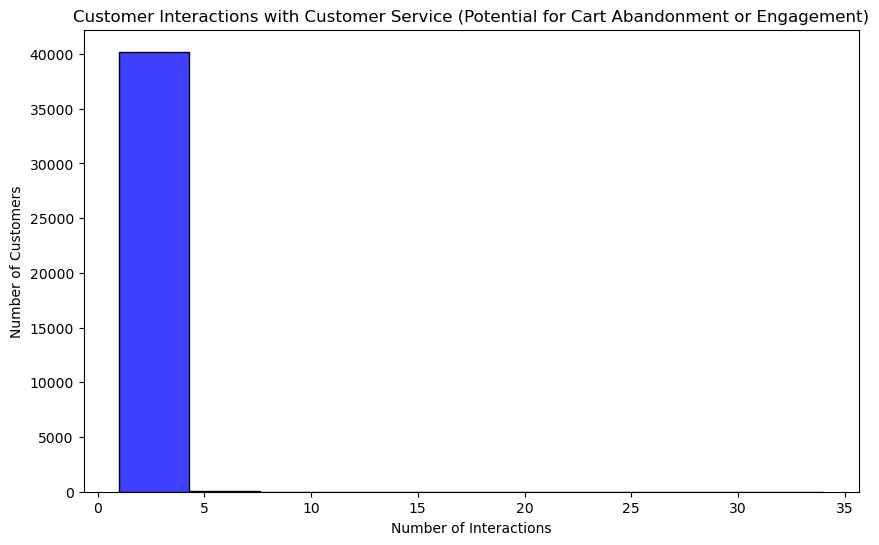

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(interaction_counts, kde=False, color='blue', bins=10)
plt.title('Customer Interactions with Customer Service (Potential for Cart Abandonment or Engagement)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Customers')
plt.show()

In [59]:
# Evaluate Customer Engagement through Preferred Communication Channel
# Count the number of times each communication channel was preferred
comm_channel_engagement = cust_df['Preferred Communication Channel'].value_counts()
comm_channel_engagement

Preferred Communication Channel
In-Person Meeting    14311
Phone                11872
Mail                 10429
Email                 8803
Text                  8088
Name: count, dtype: int64

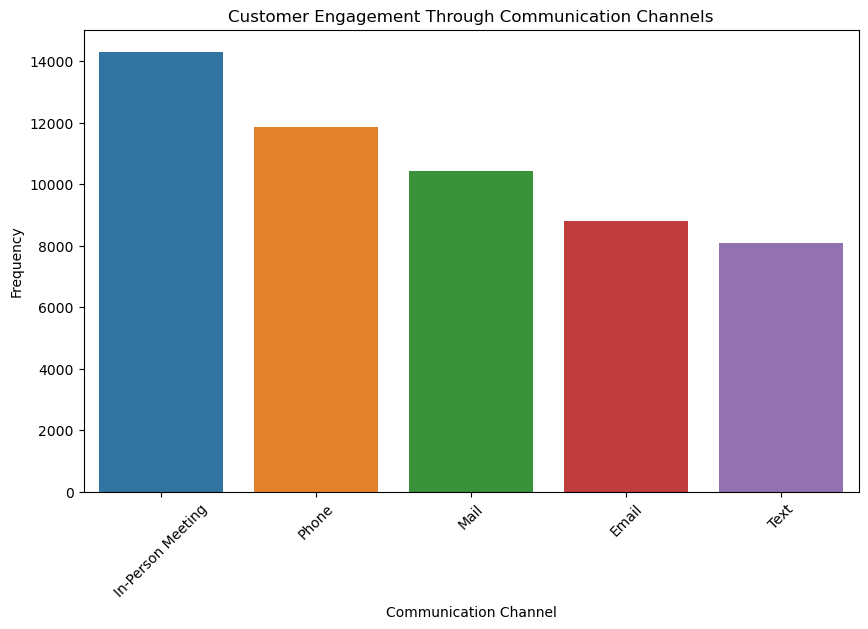

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=comm_channel_engagement.index, y=comm_channel_engagement.values, hue=comm_channel_engagement.index, legend=False)
plt.title('Customer Engagement Through Communication Channels')
plt.xlabel('Communication Channel')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [63]:
# Customer Engagement Based on Interactions
# Find the most common interaction for each customer (how often a customer interacts with service for a specific product)
customer_interaction_summary = cust_df.groupby('Customer ID')['Interactions with Customer Service'].apply(lambda x: Counter(x).most_common(1))

# Display the most frequent interactions per customer
print("\nMost Frequent Interactions for Each Customer:")
print(customer_interaction_summary)


Most Frequent Interactions for Each Customer:
Customer ID
1          [(In-Person, 9)]
5         [(Mobile App, 1)]
23              [(Chat, 1)]
37              [(Chat, 1)]
49              [(Chat, 1)]
                ...        
99772     [(Mobile App, 1)]
99891     [(Mobile App, 1)]
99962      [(In-Person, 1)]
99988     [(Mobile App, 1)]
100000          [(Chat, 8)]
Name: Interactions with Customer Service, Length: 40259, dtype: object


## 4. Financial Impact

In [81]:
# Calculate the average premium amount per customer
average_spending_per_customer = cust_df['Premium Amount'].mean()
print(f"Average Spending per Customer: {average_spending_per_customer:.2f}")

Average Spending per Customer: 3023.70


In [84]:
# Calculate Profitability Margin per customer
cust_df['Profitability Margin'] = cust_df['Premium Amount'] - cust_df['Coverage Amount']

# Calculate average profitability margin
average_profit_margin = cust_df['Profitability Margin'].mean()

print(f"Absolute Average Profitability Margin: {abs(average_profit_margin):.2f}")

Absolute Average Profitability Margin: 489557.09


In [85]:
# Segment customers by income level (credit risk)
def credit_risk(income):
    if income > 100000:  # High income -> Low credit risk
        return 'Low Risk'
    elif income > 50000:  # Medium income
        return 'Medium Risk'
    else:
        return 'High Risk'

cust_df['Credit Risk'] = cust_df['Income Level'].apply(credit_risk)

# Show segmented customers by credit risk
credit_risk_distribution = cust_df['Credit Risk'].value_counts()
print(credit_risk_distribution)

Credit Risk
Medium Risk    21381
Low Risk       19565
High Risk      12557
Name: count, dtype: int64


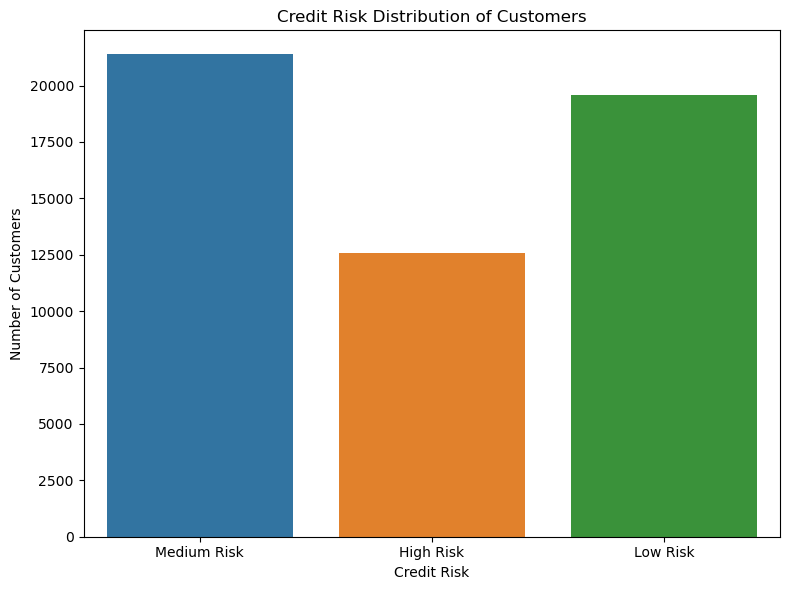

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit Risk', data=cust_df, hue='Credit Risk', legend=False)
plt.title('Credit Risk Distribution of Customers')
plt.xlabel('Credit Risk')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [87]:
# Segment by Financial Stability (Income & Coverage Amount)
def financial_stability(row):
    if row['Income Level'] > 100000 and row['Coverage Amount'] > 500000:
        return 'High Stability'
    elif row['Income Level'] > 50000:
        return 'Medium Stability'
    else:
        return 'Low Stability'

cust_df['Financial Stability'] = cust_df.apply(financial_stability, axis=1)

# Show the distribution of Financial Stability
financial_stability_distribution = cust_df['Financial Stability'].value_counts()
print(financial_stability_distribution)

Financial Stability
Medium Stability    31788
Low Stability       12557
High Stability       9158
Name: count, dtype: int64


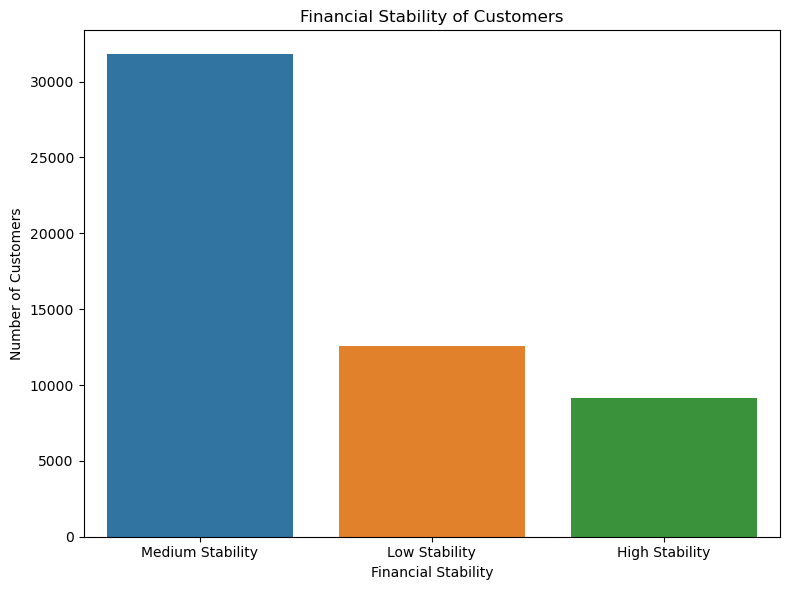

In [111]:
# Visualization of Financial Stability
plt.figure(figsize=(8, 6))
sns.countplot(x='Financial Stability', data=cust_df,hue='Financial Stability', legend=False)
plt.title('Financial Stability of Customers')
plt.xlabel('Financial Stability')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

## 5. Loyalty Metrics

In [90]:
# Count the number of purchases per customer (based on 'Customer ID' and 'Purchase History')
repeat_customers = cust_df.groupby('Customer ID')['Purchase History'].count()

# Customers who have made more than one purchase
repeat_customers = repeat_customers[repeat_customers > 1]
print(f"Number of repeat customers: {len(repeat_customers)}")

Number of repeat customers: 2456


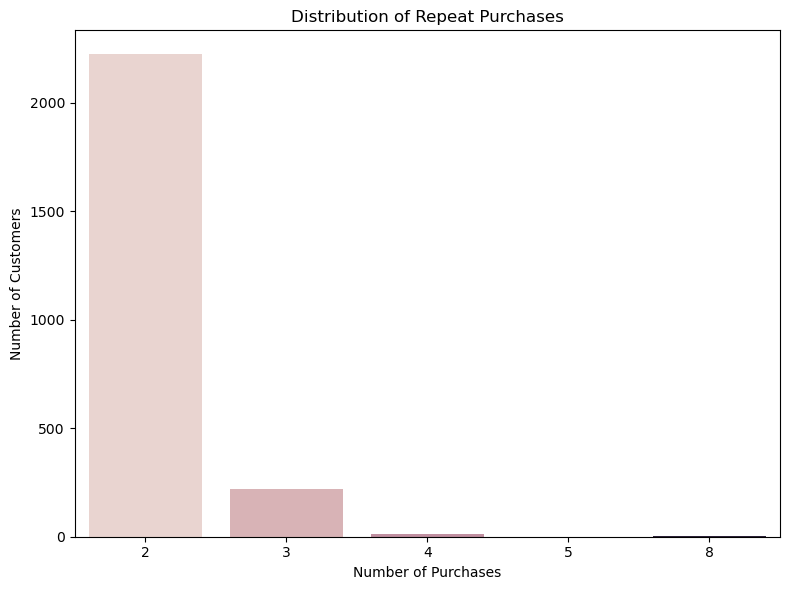

In [107]:
# Repeat purchases distribution
repeat_purchase_counts = repeat_customers.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=repeat_purchase_counts.index, y=repeat_purchase_counts.values, legend = False,hue=repeat_purchase_counts.index)
plt.title('Distribution of Repeat Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [91]:
# Count the number of interactions each customer has had with customer service
interaction_counts = cust_df.groupby('Customer ID')['Interactions with Customer Service'].count()

# Identify customers with frequent interactions
frequent_interactions = interaction_counts[interaction_counts > 1]
print(f"Number of customers with frequent interactions: {len(frequent_interactions)}")

Number of customers with frequent interactions: 10644


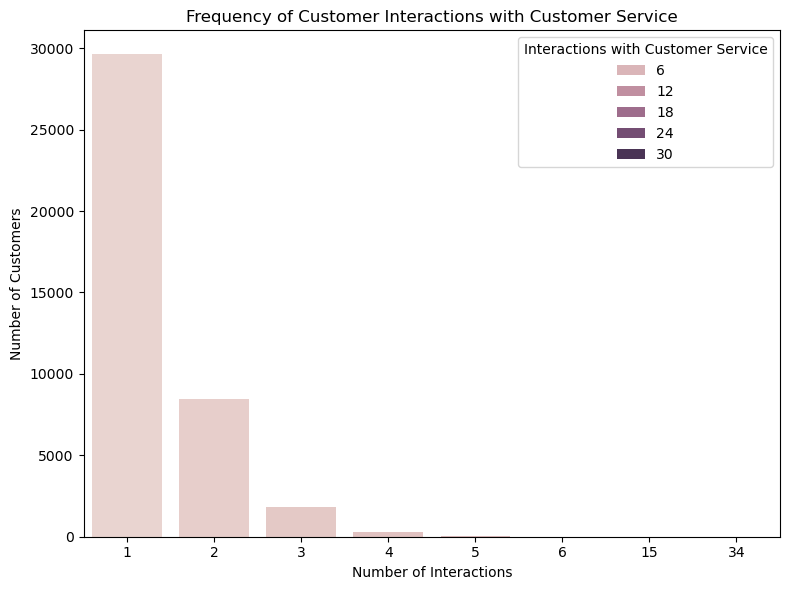

In [110]:
# Interaction frequency
interaction_counts_distribution = interaction_counts.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=interaction_counts_distribution.index, y=interaction_counts_distribution.values, hue=interaction_counts_distribution.index)
plt.title('Frequency of Customer Interactions with Customer Service')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [92]:
# Calculate total spend per customer (based on 'Premium Amount')
cust_df['Total Spend'] = cust_df.groupby('Customer ID')['Premium Amount'].transform('sum')

# Define high-value customers: those who have made repeat purchases and have high total spend
high_value_customers = cust_df[(cust_df['Customer ID'].isin(repeat_customers.index)) & (cust_df['Total Spend'] > 50000)]

print(f"Number of high-value customers: {len(high_value_customers)}")

Number of high-value customers: 34


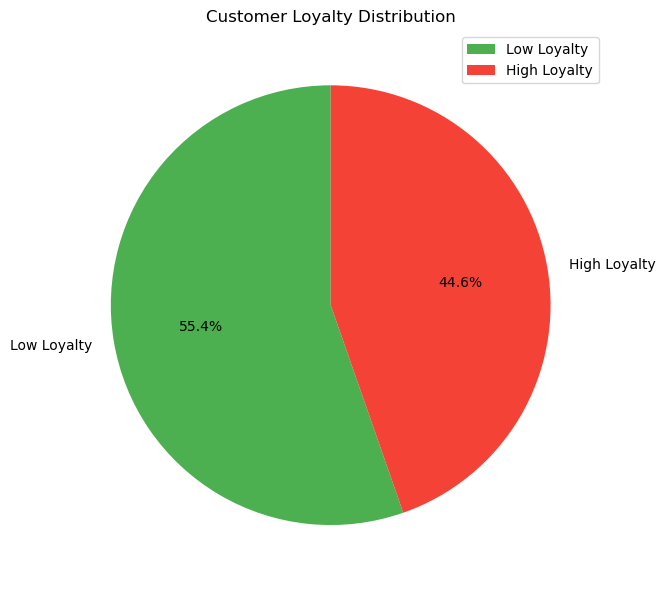

In [97]:
# Pie chart for loyalty status
loyalty_distribution = cust_df['Loyalty Status'].value_counts()

plt.figure(figsize=(8, 6))
loyalty_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'], legend=True)
plt.title('Customer Loyalty Distribution')
plt.ylabel('')  # Hide the y-label for cleaner chart
plt.tight_layout()
plt.show()

## 6. Market Trends

<Figure size 1000x600 with 0 Axes>

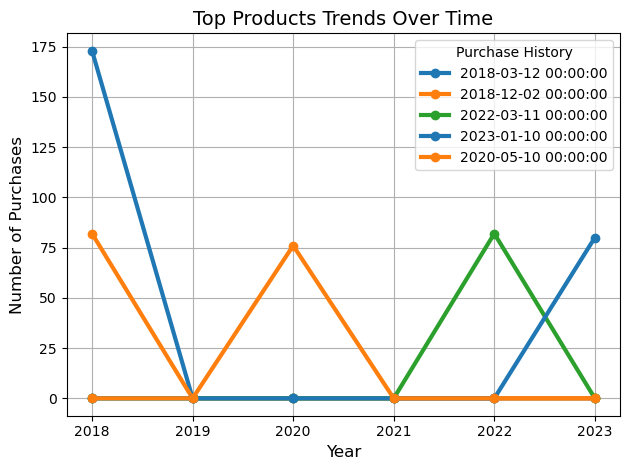

In [105]:
# Focus on top N product types based on the number of purchases
top_n = 5  # You can adjust this number based on your data

# Get the top N products by total purchases over all years
top_products = product_trends.groupby('Purchase History')['Purchase Count'].sum().nlargest(top_n).index

# Filter data to include only the top products
filtered_product_trends_pivot = product_trends_pivot[top_products]

# Plot the trends for the top N products over the years
plt.figure(figsize=(10, 6))
filtered_product_trends_pivot.plot(kind='line', marker='o', linewidth=3, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Title and labels
plt.title('Top Products Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)

# Clean up the plot for simplicity
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

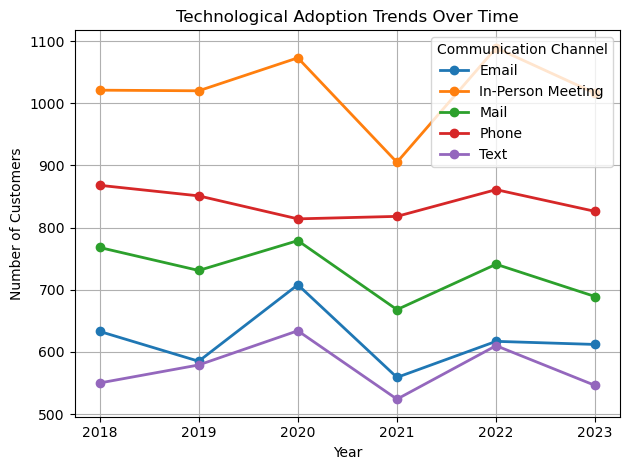

In [103]:
# Group by year and communication channel to see technological adoption trends
channel_adoption = cust_df.groupby(['Year', 'Preferred Communication Channel'])['Customer ID'].count().reset_index(name='Customer Count')

# Pivot the data to get the distribution of channel adoption by year
channel_adoption_pivot = channel_adoption.pivot(index='Year', columns='Preferred Communication Channel', values='Customer Count').fillna(0)

# Plot technological adoption trends
plt.figure(figsize=(10, 6))
channel_adoption_pivot.plot(kind='line', marker='o', linewidth=2)
plt.title('Technological Adoption Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.legend(title='Communication Channel')
plt.grid(True)
plt.tight_layout()
plt.show()